# Лабораторна робота №6. Варіант 1.
# ІП-13 Ал Хадам Мурат
# Аналіз настроїв
## Мета роботи: Ознайомитись з вирішенням задачі аналізу настроїв та базовими можливостями бібліотеки spaCy.
## Завдання: 
Створити програму, яка:
- Файл twitter1.csv. Використати логістичну регресію
1. а) Зчитує заданий набір даних, виконує попередню обробку, розбиває дані на навчальні на тестові. Виконує аналіз настроїв за допомогою алгоритмів класифікації (логістичної регресії, опорних векторів і т.д.). Виводить матрицю невідповідностей та точність моделі. 
б) Використовує один з готових лексиконів, наприклад Textblob, для аналізу оцінки настроїв. Також розраховує матрицю невідповідностей, та точність моделі.
в) Обирає три випадкові записи та виводить результати оцінки їх настрою за пунктами а) і б).
2. Виконує завдання відповідно до варіанту засобами бібліотеки spaCy.
- Файл lab6-1.txt. 
а) Знайти та вивести стоп-слова, які присутні у тексті.
б) Знайти та вивести всі іменники, які присутні у тексті. 
в) Знайти та вивести числа і дати, які присутні у тексті.

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings("ignore")
from textblob import TextBlob
import seaborn as sns
import matplotlib.pyplot as plt
import random

In [2]:
# Завантаження даних
data = pd.read_csv('twitter1.csv', names=['id', 'domain', 'sentiment', 'text'])
data

,id,domain,sentiment,text
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
...,...,...,...,...
74677,9200,Nvidia,Positive,Just realized that the Windows partition of my...
74678,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
74679,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74680,9200,Nvidia,Positive,Just realized between the windows partition of...


In [3]:
data.isnull().sum()

id             0
domain         0
sentiment      0
text         686
dtype: int64

In [4]:
data = data.dropna()
data

,id,domain,sentiment,text
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
...,...,...,...,...
74677,9200,Nvidia,Positive,Just realized that the Windows partition of my...
74678,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
74679,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74680,9200,Nvidia,Positive,Just realized between the windows partition of...


In [5]:
data['sentiment'].value_counts()

sentiment
Negative      22358
Positive      20655
Neutral       18108
Irrelevant    12875
Name: count, dtype: int64

In [6]:
X = data['text']
y = data['sentiment']
y

0        Positive
1        Positive
2        Positive
3        Positive
4        Positive
           ...   
74677    Positive
74678    Positive
74679    Positive
74680    Positive
74681    Positive
Name: sentiment, Length: 73996, dtype: object

In [7]:
encoder = LabelEncoder()
y = encoder.fit_transform(y)
y

array([3, 3, 3, ..., 3, 3, 3])

In [8]:
label_mapping = {index: label for index, label in enumerate(encoder.classes_)}
print(label_mapping)

{0: 'Irrelevant', 1: 'Negative', 2: 'Neutral', 3: 'Positive'}


Розбиття даних на навчальні та тестові

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Векторизація текстів

In [10]:
vectorizer = TfidfVectorizer()

X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

Навчання моделі логістичної регресії

In [11]:
model = LogisticRegression()
model.fit(X_train_vec, y_train)

LogisticRegression()

Матриця невідповідностей та точність моделі

In [12]:
def display_results(y_test, y_pred, class_labels=['Irrelevant', 'Negative', 'Neutral', 'Positive'], name='Logistic Regression'):
    conf_matrix = confusion_matrix(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    
    confusion_df = pd.DataFrame(conf_matrix, index=class_labels, columns=class_labels)
    sns.heatmap(confusion_df, annot=True, fmt='d', cmap='YlOrBr')
    
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix for {name}')
    plt.show()
    
    print(f'Classification report for {name}:', report, sep='\n')
    print(f'Accuracy score for {name}:', accuracy)

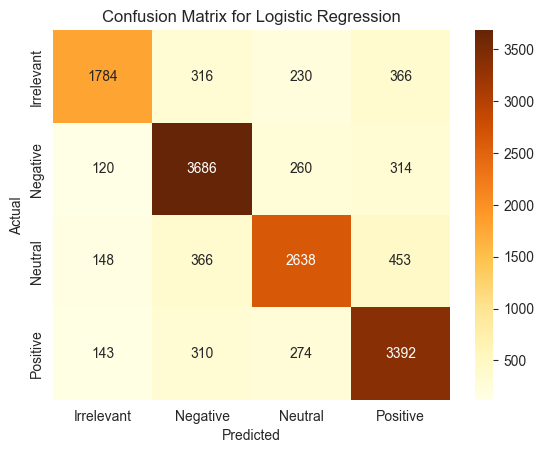

Classification report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.81      0.66      0.73      2696
           1       0.79      0.84      0.81      4380
           2       0.78      0.73      0.75      3605
           3       0.75      0.82      0.78      4119

    accuracy                           0.78     14800
   macro avg       0.78      0.76      0.77     14800
weighted avg       0.78      0.78      0.78     14800

Accuracy score for Logistic Regression: 0.777027027027027


In [13]:
y_pred = model.predict(X_test_vec)
display_results(y_test, y_pred)

б) Використовує один з готових лексиконів, наприклад Textblob, для аналізу оцінки настроїв. Також розраховує матрицю невідповідностей, та точність моделі.

In [14]:
# Оцінка настроїв за допомогою TextBlob
def textblob_sentiment(text):
    analysis = TextBlob(text)
    if analysis.sentiment.polarity > 0:
        return encoder.transform(['Positive'])[0]
    elif analysis.sentiment.polarity < 0:
        return encoder.transform(['Negative'])[0]
    else:
        return encoder.transform(['Neutral'])[0]

In [15]:
# Прогнозування настроїв на тестовій вибірці
# X_test = X_test[X_test['sentiment'] in ['Positive', 'Negative', 'Ne']]
y_pred_textblob = X_test.apply(textblob_sentiment)
y_pred_textblob

61413    1
44887    1
73662    2
36694    3
2308     3
        ..
12630    1
49615    1
12322    1
4355     3
52612    3
Name: text, Length: 14800, dtype: int32

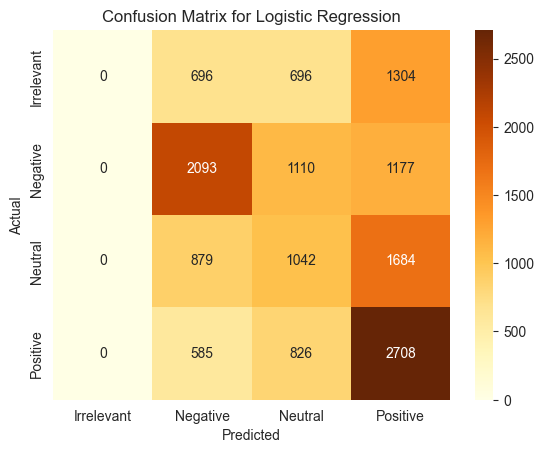

Classification report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      2696
           1       0.49      0.48      0.48      4380
           2       0.28      0.29      0.29      3605
           3       0.39      0.66      0.49      4119

    accuracy                           0.39     14800
   macro avg       0.29      0.36      0.32     14800
weighted avg       0.32      0.39      0.35     14800

Accuracy score for Logistic Regression: 0.3947972972972973


In [16]:
display_results(y_test, y_pred_textblob)

в) Обирає три випадкові записи та виводить результати оцінки їх настрою за пунктами а) і б).

In [17]:
random_indices = random.sample(range(len(X_test)), 3)
random_texts = X_test.iloc[random_indices]

# Оцінка настрою за допомогою моделі логістичної регресії
random_texts_vec = vectorizer.transform(random_texts)
logreg_predictions = model.predict(random_texts_vec)

# Оцінка настрою за допомогою TextBlob
textblob_predictions = random_texts.apply(textblob_sentiment)

In [18]:
random_results = pd.DataFrame({
    'text': random_texts,
    'logreg_sentiment': encoder.inverse_transform(logreg_predictions),
    'textblob_sentiment': encoder.inverse_transform(textblob_predictions),
    'actual_sentiment': encoder.inverse_transform(y_test[random_indices])
})

print("Random Sample Sentiment Analysis:")
random_results

Random Sample Sentiment Analysis:


,text,logreg_sentiment,textblob_sentiment,actual_sentiment
36161,see: Minecraft HD 2009 Microsoft Inspire 2019 ...,Neutral,Neutral,Neutral
4345,"If you camp in the gulag, that is a special st...",Irrelevant,Negative,Irrelevant
24648,Why lies when you can google and see that you’...,Negative,Negative,Irrelevant


## Виконує завдання відповідно до варіанту засобами бібліотеки spaCy.

In [19]:
import spacy

nlp = spacy.load('en_core_web_sm')

with open('lab6-1.txt', 'r') as file:
    text = file.read()

doc = nlp(text)
doc

US retail sales fell 0.3% in January, the biggest monthly decline since last August, driven down by a heavy fall in car sales.  The 3.3% fall in car sales had been expected, coming after December's 4% rise in car sales, fuelled by generous pre-Christmas special offers. Excluding the car sector, US retail sales were up 0.6% in January, twice what some analysts had been expecting. US retail spending is expected to rise in 2005, but not as quickly as in 2004.  Steve Gallagher, US chief economist at SG Corporate & Investment Banking, said January's figures were "decent numbers".  "We are not seeing the numbers that we saw in the second half of 2004, but they are still pretty healthy," he added. Sales at appliance and electronic stores were down 0.6% in January, while sales at hardware stores dropped by 0.3% and furniture store sales dipped 0.1%. Sales at clothing and clothing accessory stores jumped 1.8%, while sales at general merchandise stores, a category that includes department stores

а) Знайти та вивести стоп-слова, які присутні у тексті.

In [20]:
stop_words_in_text = [token.text for token in doc if token.is_stop]
print("Стоп-слова у тексті:")
print(set(stop_words_in_text))

Стоп-слова у тексті:
{'We', 'of', 'put', 'what', 'only', 'in', 'after', 'not', 'we', 'part', 'are', 'at', 'they', 'is', 'down', 'had', 'that', 'their', 'just', 'some', 'since', 'by', 'a', 'he', 'as', 'still', 'were', 'US', 'been', 'to', 'and', 'the', 'than', 'while', 'The', 'for', 'first', 'last', 'would', 'up', 'These', "'s", 'In', 'but'}


б) Знайти та вивести всі іменники, які присутні у тексті. 

In [21]:
nouns = [token.text for token in doc if token.pos_ == "NOUN"]
print("\nІменники у тексті:")
print(set(nouns))


Іменники у тексті:
{'clothing', 'department', '%', 'decline', 'fall', 'offers', 'spending', 'gains', 'restaurants', 'houses', 'merchandise', 'coffee', 'quarter', 'numbers', 'part', 'Consumers', 'hardware', 'Sales', 'growth', 'vouchers', 'strength', 'rate', 'half', 'sector', 'rise', 'appliance', 'accessory', 'consumer', 'strategist', 'bond', 'store', 'car', 'analysts', 'gift', 'category', 'stores', 'sales', 'furniture', 'bars', 'consumers', 'grocery', 'figures', 'economist'}


в) Знайти та вивести числа і дати, які присутні у тексті.

In [22]:
numbers = [token.text for token in doc if token.like_num]
dates = [ent.text for ent in doc.ents if ent.label_ in ("DATE", "TIME")]
print("\nЧисла у тексті:")
print(set(numbers))
print("\nДати у тексті:")
print(set(dates))


Числа у тексті:
{'0.3', '1.1', 'first', '0.9', '0.5', '4', '0.1', '2004', '1.8', '3.3', '2005', '0.6', 'second'}

Дати у тексті:
{'January', 'last August', 'December', 'the second half of 2004', 'the first quarter', 'monthly', '2004', '2005', 'pre-Christmas', 'Christmas'}
